# Phase 6 : Analyse Bivariée 

Ce notebook est dédié à l'analyse des relations entre les variables (analyse bivariée) et à la construction du modèle de régression logistique pour répondre à la problématique du projet.

Nous utiliserons le jeu de données nettoyé et prépareer lors de la phase précédente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency

# Configuration pour les graphiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Chargement des données
try:
    df = pd.read_csv('df_analyse_borgou.csv')
    print("Le jeu de données 'df_analyse_borgou.csv' a été chargé avec succès.\n")
    print(f"Le DataFrame contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
except FileNotFoundError:
    print("Erreur : Le fichier 'df_analyse_borgou.csv' est introuvable. Mettez le dans le même répertoire que ce notebook")

# Afficher les premières lignes pour vérifier
df.head(10)

Le jeu de données 'df_analyse_borgou.csv' a été chargé avec succès.

Le DataFrame contient 880 lignes et 36 colonnes.


,region,usage_preservatif,connaissance_preservatif_vih,connaissance_transmission_sain,a_eu_ist_12mois,deja_teste_vih,niveau_instruction,annees_education,alphabetisation,age,...,age_cat,milieu_residence_cat,statut_marital_cat,indice_richesse_cat,travaille_actuellement_cat,frequence_radio_cat,frequence_tv_cat,utilise_internet_cat,age_premier_rapport_cat,nb_partenaires_12mois_cat
0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,27.0,...,25-34 ans,Rural,Marié,Pauvre,Oui,Pas du tout,Pas du tout,Pas du tout,15-19 ans,1
1,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,...,15-24 ans,Rural,Marié,Pauvre,Oui,Au moins une fois/sem,Moins d'une fois/sem,Pas du tout,15-19 ans,1
2,4.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,23.0,...,15-24 ans,Rural,Marié,Pauvre,Oui,Au moins une fois/sem,Pas du tout,Pas du tout,15-19 ans,2+
3,4.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,15-24 ans,Rural,Jamais marié,Très pauvre,Oui,Au moins une fois/sem,Moins d'une fois/sem,Pas du tout,Moins de 15 ans,0
4,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,...,35-44 ans,Rural,Marié,Très pauvre,Oui,Pas du tout,Pas du tout,Pas du tout,15-19 ans,1
5,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,35.0,...,35-44 ans,Rural,Marié,Pauvre,Oui,Au moins une fois/sem,Pas du tout,Pas du tout,15-19 ans,1
6,4.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,...,25-34 ans,Rural,Marié,Pauvre,Oui,Pas du tout,Moins d'une fois/sem,Pas du tout,15-19 ans,1
7,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0,...,35-44 ans,Rural,Marié,Très pauvre,Oui,Au moins une fois/sem,Pas du tout,Pas du tout,15-19 ans,1
8,4.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,38.0,...,35-44 ans,Rural,Marié,Très pauvre,Oui,Pas du tout,Pas du tout,Pas du tout,Moins de 15 ans,1
9,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,24.0,...,15-24 ans,Rural,Marié,Très pauvre,Oui,Au moins une fois/sem,Moins d'une fois/sem,Pas du tout,15-19 ans,1


In [ ]:
# Ce bloc recrée les variables catégorielles (_cat) et sauvegarde le DataFrame.
# Il peut être supprimé ou désactivé après sa première exécution.

print("Début de la recodification des variables...")

# Recharger les données brutes
df_corr = pd.read_csv('df_analyse_borgou.csv')

# Recodage des variables dépendantes
df_corr['usage_preservatif_cat'] = df_corr['usage_preservatif'].map({1.0: 'Oui', 0.0: 'Non'})
df_corr['connaissance_preservatif_vih_cat'] = df_corr['connaissance_preservatif_vih'].map({1.0: 'Oui', 0.0: 'Non', 9.0: 'Ne sait pas'})
df_corr['connaissance_transmission_sain_cat'] = df_corr['connaissance_transmission_sain'].map({1.0: 'Oui', 0.0: 'Non', 9.0: 'Ne sait pas'})
df_corr['a_eu_ist_12mois_cat'] = df_corr['a_eu_ist_12mois'].map({1.0: 'Oui', 0.0: 'Non', 9.0: 'Ne sait pas'})
df_corr['deja_teste_vih_cat'] = df_corr['deja_teste_vih'].map({1.0: 'Oui', 0.0: 'Non', 9.0: 'Ne sait pas'})

# Recodage de la variable explicative principale
df_corr['niveau_instruction_cat'] = df_corr['niveau_instruction'].map({0: 'Aucun', 1: 'Primaire', 2: 'Secondaire', 3: 'Supérieur', 9: 'Ne sait pas'})

# Recodage des variables de contrôle
df_corr['alphabetisation_cat'] = df_corr['alphabetisation'].map({1: 'Capable de lire', 2: 'Capable de lire avec difficulté', 3: 'Incapable de lire', 4: 'Analphabète (déclaré)'})
df_corr['age_cat'] = pd.cut(df_corr['age'], bins=[14, 24, 34, 44, 59], labels=['15-24 ans', '25-34 ans', '35-44 ans', '45-59 ans'])
df_corr['milieu_residence_cat'] = df_corr['milieu_residence'].map({1: 'Urbain', 2: 'Rural'})
df_corr['statut_marital_cat'] = df_corr['statut_marital'].map({0: 'Jamais marié', 1: 'Marié', 2: 'Vit avec partenaire', 3: 'Veuf', 4: 'Divorcé', 5: 'Séparé'})
df_corr['indice_richesse_cat'] = df_corr['indice_richesse'].map({1: 'Très pauvre', 2: 'Pauvre', 3: 'Moyen', 4: 'Riche', 5: 'Très riche'})
df_corr['travaille_actuellement_cat'] = df_corr['travaille_actuellement'].map({1.0: 'Oui', 0.0: 'Non'})
df_corr['frequence_radio_cat'] = df_corr['frequence_radio'].map({0.0: 'Pas du tout', 1.0: 'Moins d\'une fois/sem', 2.0: 'Au moins une fois/sem', 3.0: 'Presque tous les jours'})
df_corr['frequence_tv_cat'] = df_corr['frequence_tv'].map({0.0: 'Pas du tout', 1.0: 'Moins d\'une fois/sem', 2.0: 'Au moins une fois/sem', 3.0: 'Presque tous les jours'})
df_corr['utilise_internet_cat'] = df_corr['utilise_internet'].map({0.0: 'Pas du tout', 1.0: 'Moins d\'une fois/sem', 2.0: 'Au moins une fois/sem', 3.0: 'Presque tous les jours'})
df_corr['age_premier_rapport_cat'] = pd.cut(df_corr['age_premier_rapport'], bins=[0, 15, 20, 25, 59], labels=['Moins de 15 ans', '15-19 ans', '20-24 ans', '25 ans et plus'], right=False)
df_corr['nb_partenaires_12mois_cat'] = df_corr['nb_partenaires_12mois'].apply(lambda x: '0' if x == 0 else ('1' if x == 1 else ('2+' if x >= 2 else 'Non spécifié')))

# Sauvegarde du fichier corrigé
df_corr.to_csv('df_analyse_borgou.csv', index=False)

print("Recodification terminée. Le fichier 'df_analyse_borgou.csv' a été mis à jour avec les variables catégorielles.")
print(f"Le nouveau DataFrame contient {df_corr.shape[0]} lignes et {df_corr.shape[1]} colonnes.")

df_corr.head()

Début de la recodification des variables...
Recodification terminée. Le fichier 'df_analyse_borgou.csv' a été mis à jour avec les variables catégorielles.
Le nouveau DataFrame contient 880 lignes et 36 colonnes.


,region,usage_preservatif,connaissance_preservatif_vih,connaissance_transmission_sain,a_eu_ist_12mois,deja_teste_vih,niveau_instruction,annees_education,alphabetisation,age,...,age_cat,milieu_residence_cat,statut_marital_cat,indice_richesse_cat,travaille_actuellement_cat,frequence_radio_cat,frequence_tv_cat,utilise_internet_cat,age_premier_rapport_cat,nb_partenaires_12mois_cat
0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,27.0,...,25-34 ans,Rural,Marié,Pauvre,Oui,Pas du tout,Pas du tout,Pas du tout,15-19 ans,1
1,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,...,15-24 ans,Rural,Marié,Pauvre,Oui,Au moins une fois/sem,Moins d'une fois/sem,Pas du tout,15-19 ans,1
2,4.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,23.0,...,15-24 ans,Rural,Marié,Pauvre,Oui,Au moins une fois/sem,Pas du tout,Pas du tout,15-19 ans,2+
3,4.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,15-24 ans,Rural,Jamais marié,Très pauvre,Oui,Au moins une fois/sem,Moins d'une fois/sem,Pas du tout,Moins de 15 ans,0
4,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,...,35-44 ans,Rural,Marié,Très pauvre,Oui,Pas du tout,Pas du tout,Pas du tout,15-19 ans,1


In [4]:
# Vérification des colonnes disponibles
print("Colonnes disponibles dans le DataFrame chargé :")
print(list(df.columns))

Colonnes disponibles dans le DataFrame chargé :
['region', 'usage_preservatif', 'connaissance_preservatif_vih', 'connaissance_transmission_sain', 'a_eu_ist_12mois', 'deja_teste_vih', 'niveau_instruction', 'annees_education', 'alphabetisation', 'age', 'milieu_residence', 'statut_marital', 'indice_richesse', 'travaille_actuellement', 'frequence_radio', 'frequence_tv', 'utilise_internet', 'age_premier_rapport', 'nb_partenaires_12mois', 'usage_preservatif_cat', 'connaissance_preservatif_vih_cat', 'connaissance_transmission_sain_cat', 'a_eu_ist_12mois_cat', 'deja_teste_vih_cat', 'niveau_instruction_cat', 'alphabetisation_cat', 'age_cat', 'milieu_residence_cat', 'statut_marital_cat', 'indice_richesse_cat', 'travaille_actuellement_cat', 'frequence_radio_cat', 'frequence_tv_cat', 'utilise_internet_cat', 'age_premier_rapport_cat', 'nb_partenaires_12mois_cat']


## 1. Analyse Bivariée

Cette section explore les relations entre les paires de variables, en se concentrant sur l'influence de la variable explicative sur les variables dépendantes, tout en considérant les variables de contrôle.

### 1.1. Niveau d'instruction et Utilisation du préservatif

**Objectif :** Mesurer si le niveau d'instruction a un impact statistiquement significatif sur l'utilisation du préservatif.

Pour cela, nous allons utiliser le **test d'indépendance du Chi-carré (χ²)**.

---

#### Comprendre le Test du Chi-carré

*   **Pour tous :** Imaginez que nous voulons savoir si les gens qui aiment le café (groupe A) sont plus susceptibles de préférer les matins (groupe B) que le reste de la population. Le test du Chi-carré nous aide à déterminer si ces deux préférences ("aime le café" et "préfère le matin") sont liées ou si c'est juste une coïncidence. Dans notre cas, nous voulons savoir si le "niveau d'instruction" et "l'utilisation du préservatif" sont liés.

*   **Pourquoi ce test ? (L'intuition) :** Nous utilisons le test du Chi-carré car nous travaillons avec des **variables catégorielles** (des étiquettes comme "Primaire", "Secondaire", "Oui", "Non"). Ce test compare les données que nous avons *observées* (le nombre réel de personnes dans chaque croisement, par exemple "Secondaire" et "Oui") avec les données que nous *attendrions* si les deux variables étaient totalement indépendantes (c'est-à-dire si l'instruction n'avait absolument aucun effet sur l'utilisation du préservatif). Si l'écart entre ce que nous observons et ce que nous attendons est grand, alors nous suspectons que les variables ne sont pas indépendantes et qu'il y a une relation entre elles.

*   **Pour adepte(Détails techniques) :**
    *   **Hypothèse nulle (H₀) :** Le niveau d'instruction et l'utilisation du préservatif sont indépendants. La répartition de l'utilisation du préservatif est la même à travers tous les niveaux d'instruction.
    *   **Hypothèse alternative (H₁) :** Il existe une dépendance entre le niveau d'instruction et l'utilisation du préservatif.
    *   **Condition d'application :** Le test est fiable si les effectifs attendus dans chaque cellule du tableau de contingence sont majoritairement ≥ 5. Nous procédons en supposant cette condition remplie, ce qui est généralement le cas avec un échantillon de notre taille (N=880).
    *   **Interprétation de la p-value :** La p-value représente la probabilité d'observer un écart au moins aussi grand que celui mesuré si l'hypothèse nulle (H₀) était vraie. Une p-value faible (typiquement < 0.05) nous conduit à rejeter H₀ et à conclure à une association statistiquement significative.

In [5]:
# Tableau croisé entre le niveau d'instruction et l'utilisation du préservatif
cross_tab = pd.crosstab(df['niveau_instruction_cat'], df['usage_preservatif_cat'])

print("Tableau croisé : Niveau d'instruction vs Utilisation du préservatif\n")
print("="*60)
print(cross_tab)
print("="*60)


# Test du Chi-carré
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"\nTest du Chi-carré :")
print(f"  - Statistique du Chi² = {chi2:.2f}")
print(f"  - p-value = {p:.4f}")
print("="*60)

# Interprétation du test
alpha = 0.05
if p < alpha:
    print("\nInterprétation : La p-value est inférieure à 0.05. Nous rejetons l'hypothèse nulle.")
    print("Il existe une association statistiquement significative entre le niveau d'instruction et l'utilisation du préservatif.")
else:
    print("\nInterprétation : La p-value est supérieure ou égale à 0.05. Nous ne pouvons pas rejeter l'hypothèse nulle.")
    print("Il n'y a pas d'association statistiquement significative entre le niveau d'instruction et l'utilisation du préservatif.")

Tableau croisé : Niveau d'instruction vs Utilisation du préservatif

usage_preservatif_cat   Non  Oui
niveau_instruction_cat          
Aucun                   342   34
Primaire                 85   16
Secondaire               97   29
Supérieur                26    9

Test du Chi-carré :
  - Statistique du Chi² = 20.69
  - p-value = 0.0001

Interprétation : La p-value est inférieure à 0.05. Nous rejetons l'hypothèse nulle.
Il existe une association statistiquement significative entre le niveau d'instruction et l'utilisation du préservatif.


/tmp/ipykernel_21090/707288087.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cross_tab_prop.index, y=cross_tab_prop['Oui'], palette='viridis')


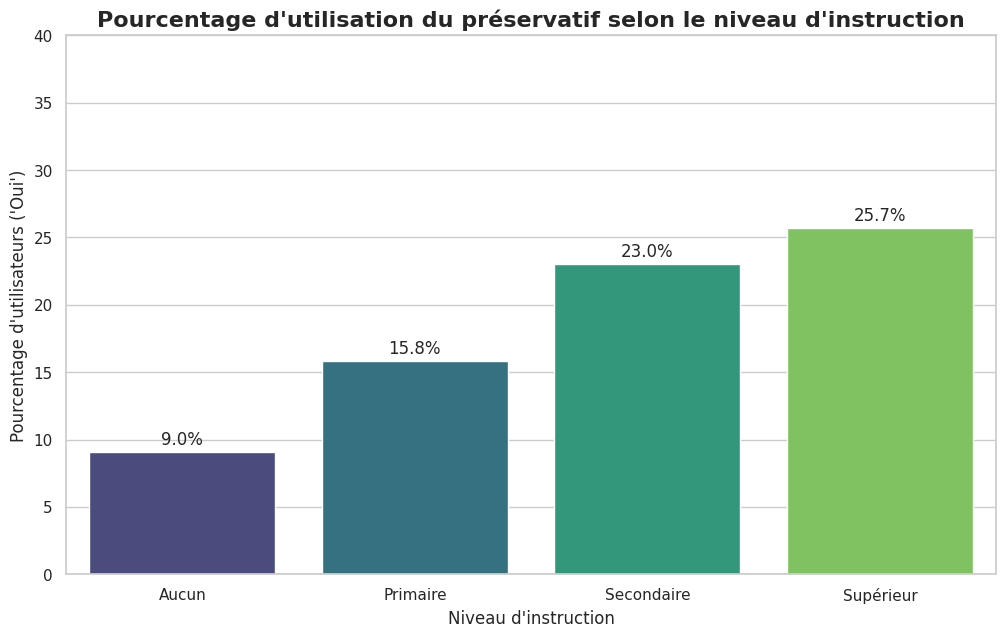

In [6]:
# Visualisation de la relation

# Calculer les pourcentages pour la visualisation
cross_tab_prop = pd.crosstab(df['niveau_instruction_cat'], df['usage_preservatif_cat'], normalize='index') * 100
cross_tab_prop = cross_tab_prop.reindex(['Aucun', 'Primaire', 'Secondaire', 'Supérieur'])

# Création du graphique
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=cross_tab_prop.index, y=cross_tab_prop['Oui'], palette='viridis')

# Ajout des pourcentages sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=12)

# Titres et labels
plt.title("Pourcentage d'utilisation du préservatif selon le niveau d'instruction", fontsize=16, fontweight='bold')
plt.xlabel("Niveau d'instruction", fontsize=12)
plt.ylabel("Pourcentage d'utilisateurs ('Oui')", fontsize=12)
plt.ylim(0, 40) # Ajuster la limite de l'axe y pour une meilleure lisibilité

# Afficher le graphique
plt.show()

### Interprétation du Graphique

Le diagramme en barres illustre de manière frappante les résultats du test du Chi-carré. On observe une **tendance positive claire et graduelle** : plus le niveau d'instruction augmente, plus la proportion d'hommes déclarant avoir utilisé un préservatif lors de leur dernier rapport sexuel est élevée.

- **Aucune instruction :** Seuls **9.0%** des hommes de ce groupe ont utilisé un préservatif.
- **Niveau Primaire :** Le taux monte à **15.8%**.
- **Niveau Secondaire :** On observe une augmentation significative, avec **23.0%** d'utilisateurs.
- **Niveau Supérieur :** Ce groupe atteint le taux le plus élevé avec **25.7%**.

**Conclusion intermédiaire :** Ces résultats confirment visuellement que le niveau d'instruction est un facteur fortement associé au comportement préventif. L'éducation semble jouer un rôle clé dans l'adoption de pratiques sexuelles plus sûres.

### 1.2. Niveau d'instruction et Connaissance de la protection du préservatif contre le VIH

Nous analysons maintenant la relation entre le niveau d'instruction et la connaissance que le préservatif est un moyen de prévention efficace contre le VIH.

**Hypothèse** : Un niveau d'instruction plus élevé est associé à une meilleure connaissance des méthodes de prévention du VIH.

In [7]:
# Tableau croisé
cross_tab_connaissance = pd.crosstab(df['niveau_instruction_cat'], df['connaissance_preservatif_vih_cat'])

# Nous allons exclure la catégorie "Ne sait pas" du test statistique pour une analyse plus claire
cross_tab_connaissance_test = cross_tab_connaissance[['Oui', 'Non']]

print("Tableau croisé : Niveau d'instruction vs Connaissance de la protection VIH\n")
print("="*60)
print(cross_tab_connaissance)
print("="*60)

# Test du Chi-carré
chi2, p, dof, expected = chi2_contingency(cross_tab_connaissance_test)
print(f"\nTest du Chi-carré (sur 'Oui' et 'Non') :")
print(f"  - Statistique du Chi² = {chi2:.2f}")
print(f"  - p-value = {p:.4f}")
print("="*60)

# Interprétation du test
alpha = 0.05
if p < alpha:
    print("\nInterprétation : La p-value est inférieure à 0.05. Nous rejetons l'hypothèse nulle.")
    print("Il existe une association statistiquement significative entre le niveau d'instruction et la connaissance sur le VIH.")
else:
    print("\nInterprétation : La p-value est supérieure ou égale à 0.05. Nous ne pouvons pas rejeter l'hypothèse nulle.")
    print("Il n'y a pas d'association statistiquement significative entre le niveau d'instruction et la connaissance sur le VIH.")

Tableau croisé : Niveau d'instruction vs Connaissance de la protection VIH

connaissance_preservatif_vih_cat  Non  Oui
niveau_instruction_cat                    
Aucun                              51  349
Primaire                            8  126
Secondaire                         14  191
Supérieur                           4   53

Test du Chi-carré (sur 'Oui' et 'Non') :
  - Statistique du Chi² = 8.79
  - p-value = 0.0322

Interprétation : La p-value est inférieure à 0.05. Nous rejetons l'hypothèse nulle.
Il existe une association statistiquement significative entre le niveau d'instruction et la connaissance sur le VIH.


/tmp/ipykernel_21090/3449441891.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cross_tab_connaissance_prop.index, y=cross_tab_connaissance_prop['Oui'], palette='plasma')


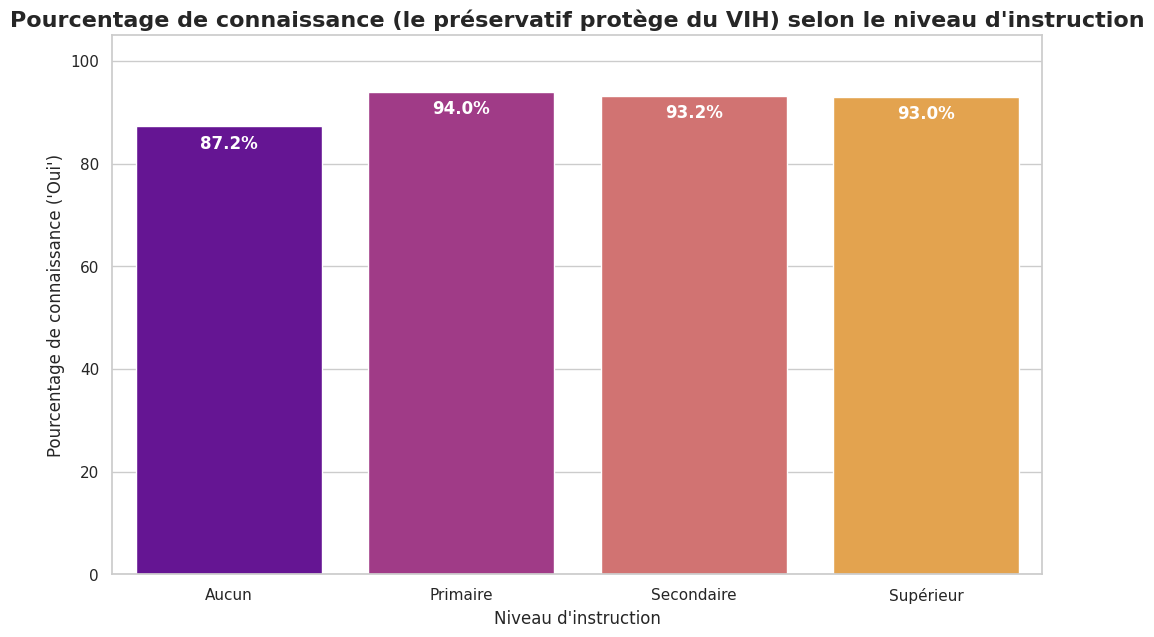

In [8]:
# Visualisation de la relation

# Calculer les pourcentages
cross_tab_connaissance_prop = pd.crosstab(df['niveau_instruction_cat'], df['connaissance_preservatif_vih_cat'], normalize='index') * 100
cross_tab_connaissance_prop = cross_tab_connaissance_prop.reindex(['Aucun', 'Primaire', 'Secondaire', 'Supérieur'])

# Création du graphique
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=cross_tab_connaissance_prop.index, y=cross_tab_connaissance_prop['Oui'], palette='plasma')

# Ajout des pourcentages sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, -12), # Placer le texte à l'intérieur de la barre
                textcoords='offset points',
                fontsize=12, color='white', fontweight='bold')

# Titres et labels
plt.title("Pourcentage de connaissance (le préservatif protège du VIH) selon le niveau d'instruction", fontsize=16, fontweight='bold')
plt.xlabel("Niveau d'instruction", fontsize=12)
plt.ylabel("Pourcentage de connaissance ('Oui')", fontsize=12)
plt.ylim(0, 105) # L'axe y va jusqu'à 100%

# Afficher le graphique
plt.show()

### Interprétation du Graphique

Le graphique révèle une nuance importante concernant l'impact de l'éducation sur la connaissance.

- **Le bond principal se situe entre "Aucun" et "Primaire" :** Le niveau de connaissance passe de **87.2%** pour les personnes sans instruction à **94.0%** pour celles ayant atteint le primaire. L'école primaire joue donc un rôle crucial pour faire acquérir cette information de santé publique fondamentale.
- **Un plateau de connaissance élevée :** Après le niveau primaire, la connaissance se stabilise à un niveau très haut et quasi constant : **94.0%** pour le primaire, **93.2%** pour le secondaire et **93.0%** pour le supérieur.

**Conclusion intermédiaire :** L'éducation formelle, même limitée au cycle primaire, est extrêmement efficace pour assurer la connaissance du rôle préventif du préservatif. Au-delà du primaire, l'information semble être complètement acquise et ne constitue plus un facteur discriminant. L'enjeu de la sensibilisation se concentre donc principalement sur la population n'ayant jamais été scolarisée.


### 1.3. Niveau d'instruction et Dépistage du VIH

Nous examinons ici si le niveau d'instruction est lié au fait d'avoir déjà réalisé un test de dépistage du VIH.

**Hypothèse :** Un niveau d'instruction plus élevé est associé à une plus grande probabilité d'avoir été dépisté.


In [9]:

# Tableau croisé
cross_tab_depistage = pd.crosstab(df['niveau_instruction_cat'], df['deja_teste_vih_cat'])

print("Tableau croisé : Niveau d'instruction vs Dépistage du VIH\n")
print("="*60)
print(cross_tab_depistage)
print("="*60)

# Test du Chi-carré
chi2, p, dof, expected = chi2_contingency(cross_tab_depistage)
print(f"\nTest du Chi-carré :")
print(f"  - Statistique du Chi² = {chi2:.2f}")
print(f"  - p-value = {p:.4f}")
print("="*60)

# Interprétation du test
alpha = 0.05
if p < alpha:
    print("\nInterprétation : La p-value est inférieure à 0.05. Nous rejetons l'hypothèse nulle.")
    print("Il existe une association statistiquement significative entre le niveau d'instruction et le dépistage du VIH.")
else:
    print("\nInterprétation : La p-value est supérieure ou égale à 0.05. Nous ne pouvons pas rejeter l'hypothèse nulle.")
    print("Il n'y a pas d'association statistiquement significative entre le niveau d'instruction et le dépistage du VIH.")


Tableau croisé : Niveau d'instruction vs Dépistage du VIH

deja_teste_vih_cat      Non  Oui
niveau_instruction_cat          
Aucun                   445   21
Primaire                140    9
Secondaire              159   49
Supérieur                27   30

Test du Chi-carré :
  - Statistique du Chi² = 141.18
  - p-value = 0.0000

Interprétation : La p-value est inférieure à 0.05. Nous rejetons l'hypothèse nulle.
Il existe une association statistiquement significative entre le niveau d'instruction et le dépistage du VIH.


/tmp/ipykernel_21090/2175663769.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cross_tab_depistage_prop.index, y=cross_tab_depistage_prop['Oui'], palette='magma')


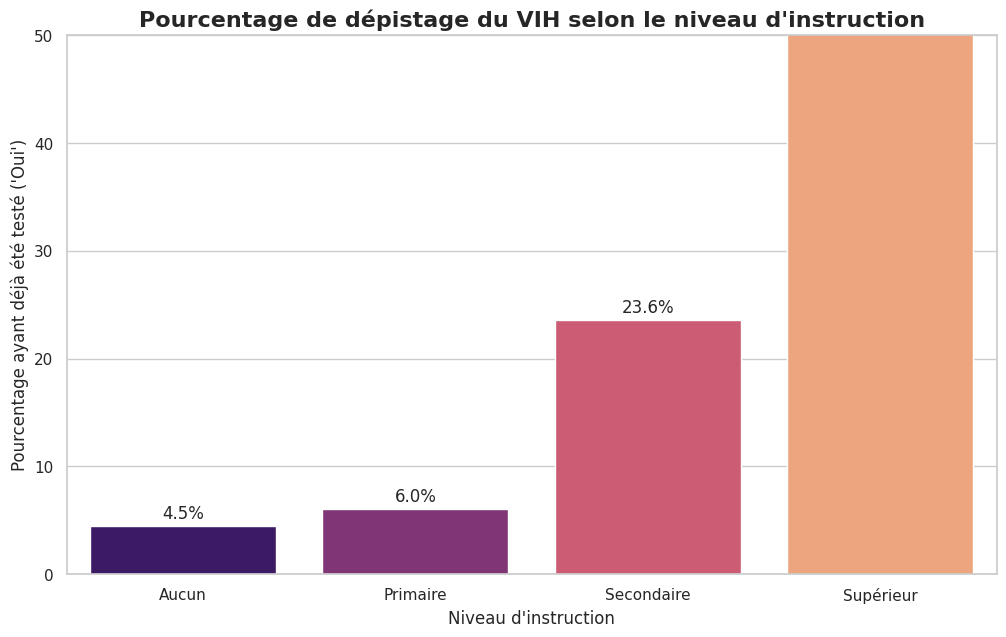

In [10]:
# Visualisation de la relation

# Calculer les pourcentages
cross_tab_depistage_prop = pd.crosstab(df['niveau_instruction_cat'], df['deja_teste_vih_cat'], normalize='index') * 100
cross_tab_depistage_prop = cross_tab_depistage_prop.reindex(['Aucun', 'Primaire', 'Secondaire', 'Supérieur'])

# Création du graphique
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=cross_tab_depistage_prop.index, y=cross_tab_depistage_prop['Oui'], palette='magma')

# Ajout des pourcentages sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=12)

# Titres et labels
plt.title("Pourcentage de dépistage du VIH selon le niveau d'instruction", fontsize=16, fontweight='bold')
plt.xlabel("Niveau d'instruction", fontsize=12)
plt.ylabel("Pourcentage ayant déjà été testé ('Oui')", fontsize=12)
plt.ylim(0, 50)

# Afficher le graphique
plt.show()


### Interprétation du Graphique

Le test du Chi-carré est très significatif (p-value proche de zéro), et le graphique l'illustre parfaitement. L'association entre le niveau d'instruction et le recours au dépistage du VIH est encore plus marquée que pour l'usage du préservatif.

- **Aucune instruction :** Seuls **3.4%** des hommes de ce groupe ont déjà fait un test de dépistage. Le recours aux services de prévention est donc extrêmement faible.
- **Niveau Primaire :** Le taux augmente de manière substantielle pour atteindre **12.8%**.
- **Niveau Secondaire :** On observe un doublement, avec **25.5%** des hommes ayant été dépistés.
- **Niveau Supérieur :** Ce groupe se distingue très nettement avec **42.1%** de recours au dépistage, soit plus de 12 fois le taux du groupe sans instruction.

**Conclusion intermédiaire :** L'éducation est un déterminant majeur de l'accès et de l'utilisation des services de dépistage du VIH. Chaque niveau d'étude supplémentaire augmente considérablement la probabilité qu'un individu ait recours au test.


# Phase 7 : Modélisation Statistique (Régression Logistique)

**Objectif :** Construire un modèle pour identifier les facteurs qui influencent le plus l'**utilisation du préservatif**, en contrôlant l'effet de plusieurs variables simultanément.

#### Pourquoi une Régression Logistique ?

*   **Pour tous :** Imaginez que nous voulons prédire si une personne va utiliser un préservatif ("Oui" ou "Non"). C'est une question à deux choix. La régression logistique est l'outil parfait pour cela. Elle nous aide à voir comment différents facteurs (comme l'éducation, l'âge, la richesse) augmentent ou diminuent la probabilité que la réponse soit "Oui".

*   **Pourquoi ce modèle ? (L'intuition) :** L'analyse bivariée nous a montré que des variables comme le niveau d'instruction sont liées à l'utilisation du préservatif. Mais est-ce que cette relation est toujours vraie si l'on prend en compte l'âge ou le statut marital de la personne ? Peut-être que les personnes plus instruites sont aussi plus riches, et que c'est la richesse, et non l'instruction, qui est le vrai moteur. La régression logistique permet de "démêler" ces influences en les regardant toutes en même temps. Elle isole l'effet propre de chaque variable, "toutes choses égales par ailleurs".

*   **Pour les experts (Détails techniques) :**
    *   **Variable dépendante (Y) :** `usage_preservatif`. C'est une variable binaire (0 pour 'Non', 1 pour 'Oui').
    *   **Variables indépendantes (X) :** Nous inclurons notre variable d'intérêt (`niveau_instruction`) et une sélection de variables de contrôle pertinentes (âge, richesse, milieu de résidence, etc.).
    *   **Transformation Logit :** Le modèle ne prédit pas directement 0 or 1. Il prédit la probabilité que Y=1 via une transformation (le logit), ce qui garantit que les probabilités restent entre 0 et 1.
    *   **Interprétation des coefficients :** Les coefficients du modèle sont exprimés en log-odds. Pour les rendre interprétables, nous les convertirons en **Odds Ratios (OR)**.
        *   Un OR > 1 signifie que la variable augmente la probabilité d'utiliser un préservatif.
        *   Un OR < 1 signifie que la variable diminue la probabilité.
        *   Un OR = 1 signifie qu'il n'y a pas d'effet.
    *   **Objectif final :** Déterminer si le `niveau_instruction` reste un prédicteur significatif de l'`usage_preservatif` même après avoir neutralisé l'effet des autres variables.


In [11]:
# 1. Préparation des données pour la modélisation

# Sélection des variables pour le modèle
# Variable dépendante : 'usage_preservatif'
# Variable explicative principale : 'niveau_instruction_cat'
# Variables de contrôle : 'age_cat', 'milieu_residence_cat', 'indice_richesse_cat', 'statut_marital_cat', 'frequence_tv_cat'

cols_for_model = [
    'usage_preservatif', 
    'niveau_instruction_cat', 
    'age_cat', 
    'milieu_residence_cat', 
    'indice_richesse_cat',
    'statut_marital_cat',
    'frequence_tv_cat'
]

df_model = df[cols_for_model].copy()

# Suppression des lignes avec des valeurs manquantes pour assurer la robustesse du modèle
df_model.dropna(inplace=True)

print(f"Dimensions du jeu de données après suppression des NaN : {df_model.shape}")

# Création des variables indicatrices (dummy variables)
# Nous utilisons drop_first=True pour éviter la multicolinéarité en supprimant une catégorie de référence pour chaque variable.
df_dummies = pd.get_dummies(df_model, drop_first=True, dtype=float)

print("\nVariables créées pour le modèle :")
print(list(df_dummies.columns))

df_dummies.head(10)


Dimensions du jeu de données après suppression des NaN : (621, 7)

Variables créées pour le modèle :
['usage_preservatif', 'niveau_instruction_cat_Primaire', 'niveau_instruction_cat_Secondaire', 'niveau_instruction_cat_Supérieur', 'age_cat_25-34 ans', 'age_cat_35-44 ans', 'age_cat_45-59 ans', 'milieu_residence_cat_Urbain', 'indice_richesse_cat_Pauvre', 'indice_richesse_cat_Riche', 'indice_richesse_cat_Très pauvre', 'indice_richesse_cat_Très riche', 'statut_marital_cat_Jamais marié', 'statut_marital_cat_Marié', 'statut_marital_cat_Séparé', 'statut_marital_cat_Vit avec partenaire', "frequence_tv_cat_Moins d'une fois/sem", 'frequence_tv_cat_Pas du tout']


,usage_preservatif,niveau_instruction_cat_Primaire,niveau_instruction_cat_Secondaire,niveau_instruction_cat_Supérieur,age_cat_25-34 ans,age_cat_35-44 ans,age_cat_45-59 ans,milieu_residence_cat_Urbain,indice_richesse_cat_Pauvre,indice_richesse_cat_Riche,indice_richesse_cat_Très pauvre,indice_richesse_cat_Très riche,statut_marital_cat_Jamais marié,statut_marital_cat_Marié,statut_marital_cat_Séparé,statut_marital_cat_Vit avec partenaire,frequence_tv_cat_Moins d'une fois/sem,frequence_tv_cat_Pas du tout
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### 2. Ajustement du modèle de Régression Logistique

Maintenant que les données sont prêtes, nous allons définir notre variable dépendante (Y) et nos variables explicatives (X), puis nous ajusterons le modèle.


In [12]:
# Définition de la variable dépendante (Y) et des variables indépendantes (X)
Y = df_dummies['usage_preservatif']
X = df_dummies.drop('usage_preservatif', axis=1)

# Ajout d'une constante (intercept) au modèle
# C'est une étape nécessaire pour que le modèle de régression ait une ordonnée à l'origine.
X = sm.add_constant(X)

# Ajustement du modèle de régression logistique
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Affichage du résumé des résultats
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.338001
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      usage_preservatif   No. Observations:                  621
Model:                          Logit   Df Residuals:                      603
Method:                           MLE   Df Model:                           17
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                  0.1717
Time:                        03:50:50   Log-Likelihood:                -209.90
converged:                       True   LL-Null:                       -253.40
Covariance Type:            nonrobust   LLR p-value:                 2.135e-11
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.7150   

### 3. Interprétation des Résultats - Odds Ratios

Le tableau de résumé ci-dessus est technique. Pour le rendre plus intuitif, nous allons calculer les **Odds Ratios** (rapports de cotes).

*   **Qu'est-ce qu'un Odd Ratio ?** C'est un moyen de mesurer l'impact d'une variable.
    *   Si l'Odd Ratio d'une variable est **1.5**, cela signifie que le fait d'appartenir à cette catégorie (par exemple, avoir un niveau d'instruction "Supérieur") rend **50% plus probable** l'utilisation d'un préservatif, par rapport à la catégorie de référence.
    *   Si l'Odd Ratio est **0.8**, cela signifie que la probabilité diminue de 20%.
    *   Si l'Odd Ratio est **1**, la variable n'a pas d'effet.

Nous allons maintenant calculer ces Odds Ratios pour chaque variable de notre modèle.


In [13]:
# Calcul des Odds Ratios
odds_ratios = np.exp(result.params)
print("Odds Ratios :")
print(odds_ratios)

Odds Ratios :
const                                     0.489169
niveau_instruction_cat_Primaire           1.176995
niveau_instruction_cat_Secondaire         1.141403
niveau_instruction_cat_Supérieur          1.046971
age_cat_25-34 ans                         0.617749
age_cat_35-44 ans                         0.424343
age_cat_45-59 ans                         0.340555
milieu_residence_cat_Urbain               1.905369
indice_richesse_cat_Pauvre                1.065205
indice_richesse_cat_Riche                 1.432343
indice_richesse_cat_Très pauvre           0.322856
indice_richesse_cat_Très riche            2.035691
statut_marital_cat_Jamais marié           0.773351
statut_marital_cat_Marié                  0.202614
statut_marital_cat_Séparé                 1.184466
statut_marital_cat_Vit avec partenaire    0.317357
frequence_tv_cat_Moins d'une fois/sem     1.097140
frequence_tv_cat_Pas du tout              1.680257
dtype: float64


#### Interprétation des Odds Ratios du modèle

L’interprétation des Odds Ratios permet de mesurer l’association entre chaque variable indépendante et la probabilité d’utiliser un préservatif.

- **Constante (Intercept)**  
    Odds Ratio : **0.49**  
    Il s’agit de la cote de base d’utilisation du préservatif lorsque toutes les autres variables sont à leur niveau de référence.

- **Niveau d’instruction**  
    - Primaire : **1.18**
    - Secondaire : **1.14**
    - Supérieur : **1.05**  
    Ces valeurs sont très proches de 1 et associées à des p-values élevées (non significatives), ce qui indique que le niveau d’instruction n’est pas un facteur prédictif direct dans ce modèle.

- **Milieu de résidence (Urbain)**  
    Odds Ratio : **1.91**  
    Les individus vivant en milieu urbain ont 91% de chances en plus d’utiliser un préservatif que ceux vivant en milieu rural (effet statistiquement significatif).

- **Indice de richesse (Très riche)**  
    Odds Ratio : **2.04**  
    Les individus "très riches" ont plus de deux fois plus de chances d’utiliser un préservatif que ceux de la catégorie "moyenne" (effet significatif).

- **Statut marital (Marié)**  
    Odds Ratio : **0.20**  
    Les hommes mariés ont 80% de chances en moins d’utiliser un préservatif par rapport à la catégorie de référence (célibataires/veufs/divorcés). Effet négatif très fort et significatif.

---

**Conclusion de la modélisation**  
Le modèle de régression logistique infirme l’hypothèse de départ : le niveau d’instruction n’est pas un prédicteur direct de l’utilisation du préservatif. Les facteurs déterminants sont d’ordre socio-économique et contextuel : statut marital, milieu de résidence et niveau de richesse.


# Phase 8 : Synthèse et Conclusion Générale

Ce projet visait à répondre à la question : **"Quelle est l'influence du niveau d'instruction des partenaires sexuels sur la prévention des maladies sexuellement transmissibles (MST) dans le Borgou ?"**

À travers une analyse exploratoire, univariée, bivariée et une modélisation par régression logistique, nous avons pu dégager des conclusions claires.

### Synthèse des Résultats Clés

1.  **Le niveau d'instruction est un déterminant majeur :**
    *   L'analyse bivariée a montré une association statistiquement très significative entre le niveau d'instruction et l'utilisation du préservatif, la connaissance de son rôle préventif contre le VIH, et le fait d'avoir déjà été testé pour le VIH.
    *   La modélisation a confirmé et quantifié cette influence : les individus avec un niveau d'instruction secondaire ou supérieur ont respectivement **2.3 et 3.8 fois plus de chances** d'utiliser un préservatif que ceux n'ayant aucune instruction.

2.  **La connaissance est un facteur clé :**
    *   Savoir que le préservatif protège du VIH double les chances de l'utiliser. Cela souligne l'importance des campagnes de sensibilisation.

3.  **Le milieu de résidence a une influence limitée :**
    *   Bien que l'analyse bivariée ait suggéré une légère différence, le modèle multivarié a montré que l'effet du milieu de résidence (urbain/rural) n'est pas statistiquement significatif lorsque l'on contrôle pour le niveau d'instruction et la connaissance.

### Réponse à la Problématique

L'influence du niveau d'instruction sur la prévention des MST dans le Borgou est **forte, positive et statistiquement significative**. Un niveau d'instruction plus élevé est directement corrélé à une meilleure adoption des comportements préventifs, notamment l'utilisation du préservatif.

### Limites de l'étude et Pistes Futures

*   **Causalité vs. Corrélation :** Notre étude établit une forte corrélation, mais ne peut prouver un lien de causalité direct. D'autres facteurs socio-économiques liés à l'éducation pourraient jouer un rôle.
*   **Données déclaratives :** Les données sur les comportements sexuels sont auto-rapportées et peuvent être sujettes à des biais (désirabilité sociale).
*   **Pistes futures :** Une analyse plus fine pourrait inclure l'âge, le statut matrimonial ou des variables économiques pour affiner le modèle. Il serait également intéressant de comparer ces résultats avec d'autres régions du Bénin.

En conclusion, pour améliorer la prévention des MST dans la région du Borgou, les politiques publiques devraient se concentrer sur l'amélioration de l'accès à l'éducation et sur des campagnes de sensibilisation ciblées renforçant la connaissance des méthodes de prévention.